# Support Vector Machine

### The following few portions will be referencing resources mainly from Kilian Weinberger's materials from CS4780 [1]. Some of the code is adapted from Antoine Hue (tonio73) [2].

The Support Vector Machine (SVM) is a linear classifier that finds a hyperplane that maximises the the distance between the hyperplane and the closest point to it (margin $\gamma$). Other linear classifiers like the Perceptron does not find any specific linearly separable hyperplane, the SVM will find one that maximises the margin. Data points closest to the separating hyperplane are support vectors.

![Perceptron vs SVM](../img/perceptron_vs_SVM.png)

Why would we want the hyperplane that gives us the largest margin? One possible reason is that it gives us a greater margin for error. Unseen data points that lie close to the hyperplane have a greater likelihood of getting incorrectly classified if the hyperplane is not intentionally set.

![Unseen test point](../img/perceptron_vs_svm_unseen.png)

The figure above shows the possible hyperplanes obtained from the linear SVM and Perceptron algorithms for the given training dataset. The SVM hyperplane gives a larger margin for error on **unseen** data points as compared to the Perceptron's. For example,  there is a test data point orange with label y = -1, the Perceptron's hyperplane will incorrectly classify that data point, whereas the linear SVM hyperplane will correctly classify that point.

## Maximising the margin

As seen from the Perceptron, the margin is the distance between the closest point across both classes and the hyperplane. Let us obtain a more formal derivation of the margin:

![Margin](../img/margin.png)

Consider a data point $\mathbf{x}$ for a support vector. Its projection onto the hyperplane is $\mathbf{x}_p$. The vector $\mathbf{d}$ that connects $\mathbf{x}$ and $\mathbf{x}_p$ is perpendicular to the hyperplane, and therefore parallel to the weight vector $\mathbf{w}$ such that $\mathbf{d}$ = $\beta \mathbf{w}$, where $\beta$ refers to a real constant. 

Given that $\mathbf{x}_p$ lies on the hyperplane, 

$$
\mathbf{w}^T\mathbf{x}_p + b = \mathbf{w}^T(\mathbf{x}-\mathbf{d}) + b = \mathbf{w}^T(\mathbf{x}-\beta\mathbf{w}) + b = 0
$$

Solving for $\beta$,

$$
\mathbf{w}^T(\mathbf{x}-\beta\mathbf{w}) + b = 0 \\
\mathbf{w}^T\mathbf{x}-\mathbf{w}^T\beta\mathbf{w} + b = 0 \\
\mathbf{w}^T\beta\mathbf{w} = \mathbf{w}^T\mathbf{x} + b \\
\beta = \frac{\mathbf{w}^T\mathbf{x} + b}{\mathbf{w}^T\mathbf{w}}
$$

Calculating the distance $\left \| \mathbf{d} \right \|_2$,

$$
\left \| \mathbf{d} \right \|_2 
= \sqrt{\mathbf{d}^T\mathbf{d}}
= \sqrt{(\beta\mathbf{w})^T\beta\mathbf{w}}
=\sqrt{\beta^2\mathbf{w}^T\mathbf{w}}
=\frac{\left | \mathbf{w}^T\mathbf{x}+b \right |}{\sqrt{\mathbf{w}^T\mathbf{w}}}
=\frac{\left | \mathbf{w}^T\mathbf{x}+b \right |}{\left \| \mathbf{w} \right \|_{2}}
$$

This gives us the distance from the hyperplane to the data point $\mathbf{x}$, and we also observe that it is inversely proportional to the length(Euclidean norm) of the weight vector $\mathbf{w}$. Given that the goal is to find the distance from the hyperplane to the closest points from it (support vectors), we want to **minimise** this distance $\left \| \mathbf{d} \right \|_2$ to allow us to get the margin $\gamma(\mathbf{w},b) = \min_{\mathbf{x}\in D}\frac{\left | \mathbf{w}^T\mathbf{x}+b \right |}{\left \| \mathbf{w} \right \|_{2}}$.

## Max Margin Classifier

We have seen that the margin $\gamma(\mathbf{w},b)$ is obtained by finding the data point in our dataset that gives us minimum distance between itself and the hyperplane. We want to maximise $\gamma(\mathbf{w},b)$ while classifying data points correctly. For a linear classifier used for binary classification $y=\left\{-1,+1\right\}$, $y_{i}(\mathbf{w}^Tx_{i}+b)\geq 0$ if the data point is classified correctly, and $y_{i}(\mathbf{w}^Tx_{i}+b)\lt 0$ if classified wrongly.

$$
\underbrace{\max_{\mathbf{w},b}\gamma(\mathbf{w},b)}_{maximise \ margin}  s.t. \ \ \underbrace{\forall i \ y_{i}(\mathbf{w}^Tx_{i}+b)\geq 0}_{separating \ hyperplane} 
$$

$$\big\downarrow$$

$$
\underbrace{\max_{\mathbf{w},b}\underbrace{\left(\min_{\mathbf{x}\in D}\frac{\left | \mathbf{w}^T\mathbf{x}+b \right |}{\left \| \mathbf{w} \right \|_{2}}\right)}_{\gamma(\mathbf{w},b)}}_{maximise \ margin}  s.t. \ \ \underbrace{\forall i \ y_{i}(\mathbf{w}^Tx_{i}+b)\geq 0}_{separating \ hyperplane}\tag{1}
$$

Given that the hyperplane and the margin is scale invariant, we can scale it in such a way that $\min_{\mathbf{x}\in D}{\left | \mathbf{w}^T\mathbf{x}+b \right |} = 1$. This means that we set the left and right margin hyperplane to be $1$ unit away from the separating hyperplane. Support vectors are now exactly $1$ unit away, and other data points are $\gt 1$ away. This also simplifies the $(1)$ to:

<br>

$$
\max_{\mathbf{w},b}\frac{1}{\left \| \mathbf{w} \right \|_{2}} s.t. \ \ 
\underbrace{\forall i \ y_{i}(\mathbf{w}^Tx_{i}+b)\geq 1}_{separating \ hyperplane} \tag{2}
$$

<br>

Maximising our margin $\frac{1}{\left \| \mathbf{w} \right \|_{2}}$ is equivalent to minimising $\left \| \mathbf{w} \right \|_{2}$, and that is equivalent to minimising $\frac{1}{2}\left \| \mathbf{w} \right \|^{2}$. $(2)$ gives the hard margin optimization condition:

\begin{matrix}
        \min_{\mathbf{w},b}\frac{1}{2}\left \| \mathbf{w} \right \|^{2}\\ 
        s.t. \ \forall i \ y_{i}(\mathbf{w}^T\mathbf{x}_{i}+b)\geq 1           
\end{matrix}

<br>

The intuition is that we want to find the simplest (first line: smallest $\mathbf{w}$) hyperplane that separates the data, such that all points are classified correctly and are at least $1$ unit away from this hyperplane (second line).

![Hard margin SVM](../img/svm_sketch.png)

Note that the total margin (distance between left and right hyperplane) is $\frac{1}{\left \| \mathbf{w} \right \|_{2}} + \frac{1}{\left \| \mathbf{w} \right \|_{2}} = \frac{2}{\left \| \mathbf{w} \right \|_{2}}$.

By using the Langrangian multiplier method (2), the SVM optimization problem can be viewed as a Langrangian function with the following:

$$
L = \frac{1}{2}\left \| \mathbf{w} \right \|^{2} - \sum_{i=1}^{n} a_i \left[y_i\left(\mathbf{w}\cdot \mathbf{x_i} + b \right)-1\right]
$$

$$\big\downarrow$$

$$
L = \frac{1}{2}\left \| \mathbf{w} \right \|^{2} - \sum_{i=1}^{n} a_i y_i\left(\mathbf{w}\cdot \mathbf{x_i} + b \right) + \sum_{i=1}^{n}a_i
$$

$$
\text{where }\frac{1}{2}\left \| \mathbf{w} \right \|^{2} \text{ is to be minimised subject to the constraints}
$$

<br>

Optimizing the Langrangian function involves taking the derivatives $\frac{\partial L}{\partial\mathbf{w}}$ and $\frac{\partial L}{\partial\mathbf{b}}$ and equating them to $0$ at the minimum:

$$
\mathbf{w} = \sum_{i=1}^{n}a_iy_i\mathbf{x}_i \text{ , } \sum_{i=1}^{n}a_iy_i = 0
$$

<br>

Plugging in the values of $\mathbf{w}$ into the primal SVM form $(3)$ gives us the **dual** form. Note that this dual form does not depend on $\mathbf{w}$ and $b$ anymore:

$$
\begin{matrix}
\min_{\alpha_1,\cdots,\alpha_n}\frac{1}{2} \sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i \alpha_j y_i y_j \left(\mathbf{x}_i \cdot \mathbf{x}_j \right) - \sum_{i=1}^{n}\alpha_i  \\
\text{s.t. } \alpha_i \geq 0 \\
\quad \sum_{i=1}^{n} \alpha_i y_i = 0
\end{matrix} \tag{3}
$$

<br>
$\alpha$ represents the supportiveness value of a data point. When minimising the optimization function $(6)$, the minimum is achieved when all non-support vectors' $\alpha = 0$, and all support vectors' $\alpha > 0$.

## Non-linearly separable data

That's fine and dandy, but what if:

![Data not linearly separable](../img/non-linear-data.png)

On the left, there is no linear hyperplane that can separate all of our data (without doing any transformation). On the right, we observe that there are green data points that lie less than $1$ unit from the hyperplane (which means that the margin condition is not satisfied).

### SVM with soft constraints

One way to tackle this problem is to impose soft constraints on the linear SVM classifier such that for some data points $y_{i}(\mathbf{w}^T \mathbf{x}_{i}+b) \lt 1$. We introduce slack variables $\xi_{i}$ that allow data points to fall within the margins, and even on the wrong side of the hyperplane.

<br>

$$
\begin{matrix}
        \min_{\mathbf{w},b, \xi}\mathbf{w}^T\mathbf{w}+C\sum_{i=1}^{n}\xi _{i} \tag{3}        \\ 
        s.t. \ \forall i \ y_{i}(\mathbf{w}^T\mathbf{x}_{i}+b)\geq 1-\xi_i        \\ 
         \forall i \ \xi_i \geq 0        
\end{matrix}
$$

<br>

$n$ here represents the total number of training data. By manipulating the second line, the slack variable $\xi_i$ can be formally shown as:

<br>

$$
\xi_i=\left\{
\begin{array}{cc}
\ 1-y_{i}(\mathbf{w}^T \mathbf{x}_{i}+b) & \textrm{ if $y_{i}(\mathbf{w}^T \mathbf{x}_{i}+b)<1$}\\
0 & \textrm{ if $y_{i}(\mathbf{w}^T \mathbf{x}_{i}+b)\geq 1$}
\end{array} \tag{4}
\right.
$$

<br>

Given that $\xi_i$ is non-negative, $(4)$ is equivalent to:

$$
\xi_i=\max(1-y_{i}(\mathbf{w}^T \mathbf{x}_{i}+b) ,0) \tag{5}
$$

<br>

For a given data point $\mathbf{x}_i$, the **hard margin** SVM classifier correctly classifies it when $y_{i}(\mathbf{w}^T \mathbf{x}_{i}+b)\geq 1$. For a correctly classified data point, no slack is needed for it ($\xi_i = 0$). However, when the data point is within the margin or incorrectly classified ($y_{i}(\mathbf{w}^T \mathbf{x}_{i}+b)\lt 1$), the slack can be imposed that allow it to be **closer** to the hyperplane. When $y_{i}(\mathbf{w}^T\mathbf{x}_{i}+b) = 0$, that data point now lies on the hyperplane, and when $y_{i}(\mathbf{w}^T\mathbf{x}_{i}+b) < 0$, it is incorrectly classified.

For a large enough $\xi$, the **original** optimization condition $\min_{\mathbf{w},b}\mathbf{w}^T\mathbf{w}$ can be met even when data points lie within the margin or when incorrectly classified. As such, the slack variable is added to the optimization condition. It is multiplied with a regularization parameter $C$ to specify how important it is to keep $\xi$ as small as possible. For a large $C$, the classifier becomes very strict when it comes to misclassifying data points. When $C$ is set to a small value, SVM becomes more lax with allowing some points to fall on the wrong side of the hyperplane. 

<!-- If we plug $(5)$ into $(3)$, the unconstrained optimization condition is obtained:

$$
\min_{\mathbf{w},b}\underbrace{\mathbf{w}^T\mathbf{w}}_{l_{2}-regularizer}+\underbrace{C\  \sum_{i=1}^{n}\max\left [ 1-y_{i}(\mathbf{w}^T \mathbf{x}+b),0 \right ]}_{hinge-loss}        	\label{eq:svmunconst}
$$ -->

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import optimize
from sklearn.datasets import make_classification

In [2]:
def generate_data(n, mu=0.5, sigma=0.3):
    """ Two gaussian clouds on each side of the origin """
    X = np.random.normal(mu, sigma, (n, 2))
    yB = np.random.uniform(0, 1, n) > 0.5
    # y is in {-1, 1}
    y = 2. * yB - 1
    X *= y[:, np.newaxis]
    X -= X.mean(axis=0)
    return X, y

def plot_data(X, y):

    with plt.style.context('seaborn-darkgrid'):
        fig, ax = plt.subplots(figsize=(10, 8))

        plt.scatter(x=X[y==-1][:, 0], y=X[y==-1][:, 1], color='r', edgecolor='k', linewidth=1, label='y = -1')
        plt.scatter(x=X[y==1][:, 0], y=X[y==1][:, 1], color='g', edgecolor='k', linewidth=1, label='y = +1')
        plt.legend()
        

def plotSVM(model):
    c = -model.intercept/model.w[1]
    m = -model.w[0]/model.w[1]
    
    c_margin = []
    signedDist = np.matmul(model.supportVectors, model.w)
    
    #Extract the values of c for support vectors furthest away from hyperplane
    c_margin.append(model.supportVectors[np.argmin(signedDist)][1] - m*model.supportVectors[np.argmin(signedDist)][0])
    c_margin.append(model.supportVectors[np.argmax(signedDist)][1] - m*model.supportVectors[np.argmax(signedDist)][0])

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    x_range = np.array([x_min, x_max])
    y_pred_svm = m*x_range + c
    y_pred_left = m*x_range + c_margin[0]
    y_pred_right = m*x_range + c_margin[1]

    plt.figure(1, figsize=(12, 10))

    #Plot points
    plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='r', edgecolor='k', linewidth=1, s=50, label='y = -1')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='g', edgecolor='k', linewidth=1, s=50, label='y = 1')
    
    #Plot transparent circles around support vectors to highlight them 
    plt.scatter(model.supportVectors[:, 0], model.supportVectors[:, 1], facecolors='none', edgecolor='purple', linewidth=2, s=200, label='Support Vectors')
    
    #Plot hyperplanes
    plt.plot(x_range, y_pred_svm, color = 'k', linewidth=2, label='Separating hyperplane')
    plt.plot(x_range, y_pred_left, color = 'k', linestyle='--', linewidth=2, alpha=0.3)
    plt.plot(x_range, y_pred_right, color = 'k', linestyle='--', linewidth=2, alpha=0.3)
    
    #Fill color on sides of hyperplane
    plt.fill_between(x_range, y_pred_svm, y_min, color='tab:blue', alpha=0.3)
    plt.fill_between(x_range, y_pred_svm, y_max, color='tab:orange', alpha=0.3)
    
    plt.legend()

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

The dual form of the SVM optimization problem with soft constraints:

$$
\begin{matrix}
\min_{\alpha_1,\cdots,\alpha_n}\frac{1}{2} \sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i \alpha_j y_i y_j \left(\mathbf{x}_i \cdot \mathbf{x}_j \right) - \sum_{i=1}^{n}\alpha_i  \\
\text{s.t.} \quad 0 \leq \alpha_i \leq C \\
\quad \sum_{i=1}^{n} \alpha_i y_i = 0
\end{matrix} \tag{6}
$$

In [3]:
class MaxMarginSoftClassifier:
    
    def __init__(self, C):
        self.C = C                                 
        self.alpha = None
        self.w = None
        self.supportVectors = None
    
    def fit(self, X, y):
        N = len(y)
        # Gram matrix of (X.y)
        Xy = X * y[:, np.newaxis]
        GramXy = np.matmul(Xy, Xy.T)

        # Lagrange dual problem
        def Ld0(G, alpha):
            return 0.5 * alpha.dot(alpha.dot(G)) - alpha.sum()

        # Partial derivate of Ld on alpha
        def Ld0dAlpha(G, alpha):
            return alpha.dot(G) - np.ones_like(alpha)

        # Constraints on alpha:
        # Splitted first constraint in (6) into 2 parts: alpha >= 0 and C - alpha >= 0
        A = np.eye(N)
        constraints = ({'type': 'eq',   'fun': lambda a: np.dot(a, y), 'jac': lambda a: y},
                       {'type': 'ineq', 'fun': lambda a: a, 'jac': lambda a: A}, 
                       {'type': 'ineq', 'fun': lambda a: self.C - a, 'jac': lambda a: -A})

        # Maximize by minimizing the opposite
        optRes = optimize.minimize(fun=lambda a: Ld0(GramXy, a),
                                   x0=np.ones(N), 
                                   method='SLSQP', 
                                   jac=lambda a: Ld0dAlpha(GramXy, a), 
                                   constraints=constraints)
        self.alpha = optRes.x
        self.w = np.sum((self.alpha[:, np.newaxis] * Xy), axis=0)  
        epsilon = 1e-6
        self.supportVectors = X[self.alpha > epsilon]
        # Support vectors is at a distance <= 1 to the separation plan
        # => use min support vector to compute the intercept, assume label is in {-1, 1}
        signedDist = np.matmul(self.supportVectors, self.w)
        minDistArg = np.argmin(signedDist)
        supportLabels = y[self.alpha > epsilon]
        self.intercept = supportLabels[minDistArg] - signedDist[minDistArg]
    
    def predict(self, X):
        """ Predict y value in {-1, 1} """
        assert(self.w is not None)
        assert(self.w.shape[0] == X.shape[1])
        return 2 * (np.matmul(X, self.w) > 0) - 1

In [4]:
def plotFourSVM(C_list):
       
    with plt.style.context('seaborn-darkgrid'):
        fig, axs = plt.subplots(2,2, figsize = (13,13))
        axs_list = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]
        
        for i in range(len(C_list)):
            model = MaxMarginSoftClassifier(C_list[i])
            model.fit(X, y)
            
            c = -model.intercept/model.w[1]
            m = -model.w[0]/model.w[1]

            c_margin = []
            signedDist = np.matmul(model.supportVectors, model.w)

            #Extract the values of c for support vectors furthest away from hyperplane
            c_margin.append(model.supportVectors[np.argmin(signedDist)][1] - m*model.supportVectors[np.argmin(signedDist)][0])
            c_margin.append(model.supportVectors[np.argmax(signedDist)][1] - m*model.supportVectors[np.argmax(signedDist)][0])

            x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
            y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

            x_range = np.array([x_min, x_max])
            y_pred_svm = m*x_range + c
            y_pred_left = m*x_range + c_margin[0]
            y_pred_right = m*x_range + c_margin[1]
            
            plt.sca(axs_list[i])

            #Plot points
            plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='r', edgecolor='k', linewidth=1, s=50, label='y = -1')
            plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='g', edgecolor='k', linewidth=1, s=50, label='y = 1')

            #Plot transparent circles around support vectors to highlight them 
            plt.scatter(model.supportVectors[:, 0], model.supportVectors[:, 1], facecolors='none', edgecolor='purple', linewidth=2, s=200, label='Support Vectors')

            #Plot hyperplanes
            plt.plot(x_range, y_pred_svm, color = 'k', linewidth=2, label='Separating hyperplane')
            plt.plot(x_range, y_pred_left, color = 'k', linestyle='--', linewidth=2, alpha=0.6)
            plt.plot(x_range, y_pred_right, color = 'k', linestyle='--', linewidth=2, alpha=0.6)
            
            #Fill color on sides of hyperplane
            plt.fill_between(x_range, y_pred_svm, y_min, color='tab:blue', alpha=0.2)
            plt.fill_between(x_range, y_pred_svm, y_max, color='tab:orange', alpha=0.2)
            
            
            plt.xlim(x_min, x_max)
            plt.ylim(y_min, y_max)
            plt.xticks([])
            plt.yticks([])

            
            plt.title(f'C = {C_list[i]}', fontsize=15, fontweight ='bold')

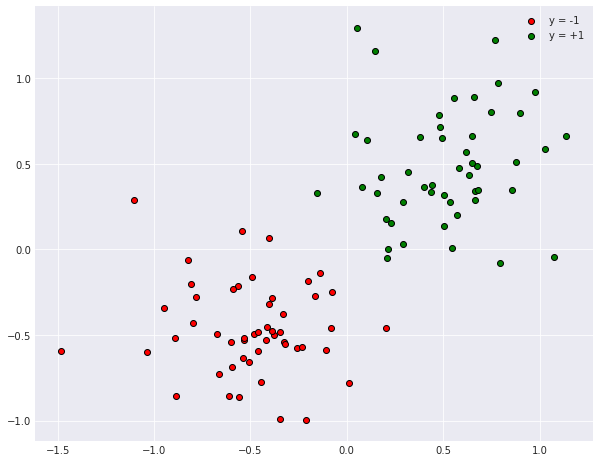

In [5]:
X, y = generate_data(100, sigma = 0.3) #Change sigma for spread
plot_data(X,y)

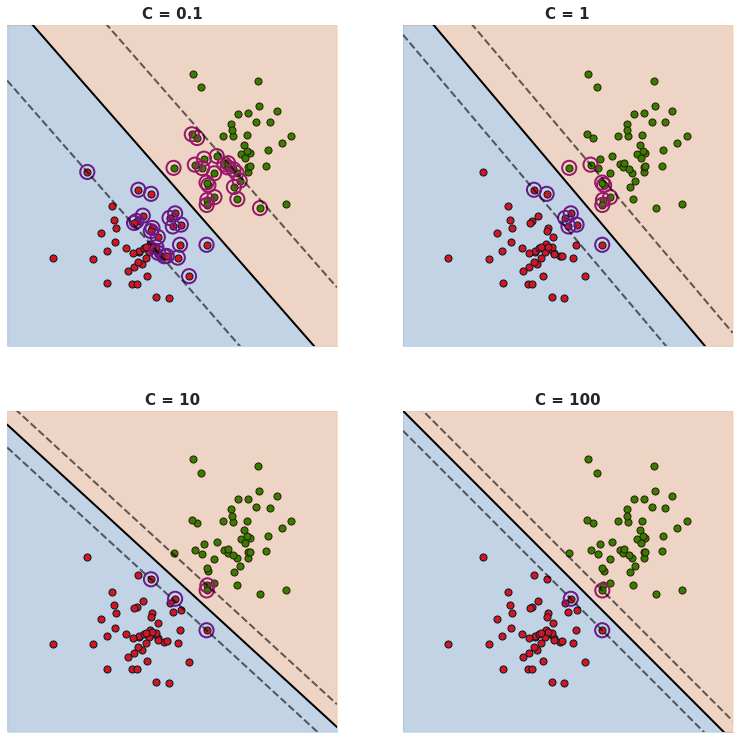

In [6]:
#Adjust value of C
#Higher values of C = more strict on getting each point correct
C_list = [0.1, 1, 10, 100]

plotFourSVM(C_list)

### SVM with transformations

SVM with soft constraints seem to help in addressing data with some noise, but what happens if data is inherently not linearly separable like this:

![Data not linearly separable 2](../img/non-linear-data-2.png)

Imposing soft constraints by itself may not be sufficient enough to to be able to obtain a linear boundary. What we can do is to add more features (to a higher dimension), or apply a transformation to our features $\mathbf{x} \rightarrow \phi(\mathbf{x})$. In this transformed feature space, the data can then be linearly separable.

Suppose we introduce a transformation $\phi$:

$$
\phi(\mathbf{x})=\begin{pmatrix}1\\ x_1\\ \vdots \\x_d \\ x_1x_2 \\ \vdots \\ x_{d-1}x_d\\ \vdots \\x_1x_2\cdots x_d \end{pmatrix}
$$

This new feature space which we can call $D$ usually has way more dimensions than the original feature space $d$ to capture non-linear interactions among the original features. Using these transformation results in a total of $2^d$ number of features per data as each feature can be either used or not used, and there are a total of $d$ features originally; so in this example $D = 2^d$. 

Substituting $\phi(\mathbf{x})$ into $(6)$:

<br>

$$
\begin{matrix}
\min_{\alpha_1,\cdots,\alpha_n}\frac{1}{2} \sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i \alpha_j y_i y_j \left(\phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j) \right) - \sum_{i=1}^{n}\alpha_i  \\
\text{s.t.} \quad 0 \leq \alpha_i \leq C \\
\quad \sum_{i=1}^{n} \alpha_i y_i = 0
\end{matrix} \tag{7}
$$

<br>

The problem with this is that because both $\phi(\mathbf{x}_i)$ and $\phi(\mathbf{x}_j)$ each have $2^d$ dimensions, their dot product takes $O(2^d)$ time complexity which can be a really long time. To circumvent that, a kernel function can be used in place of the dot product, where we can define this kernel function to be:

$$
K(\mathbf{x}_i \cdot \mathbf{x}_j) =  \phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j)
$$

$(7)$ now becomes:

<br>

$$
\begin{matrix}
\min_{\alpha_1,\cdots,\alpha_n}\frac{1}{2} \sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i \alpha_j y_i y_j K(\mathbf{x}_i \cdot \mathbf{x}_j) - \sum_{i=1}^{n}\alpha_i  \\
\text{s.t.} \quad 0 \leq \alpha_i \leq C \\
\quad \sum_{i=1}^{n} \alpha_i y_i = 0
\end{matrix}
$$

<br>

Now all we need to do is to find and calculate an appropriate kernel function $K$, and we would not need to explicitly calculate the dot product anymore. Some of the more common kernels are the linear kernel $K(\mathbf{x}_i,\mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j$, the polynomial $K(\mathbf{x}_i,\mathbf{x}_j) = \left(1 + \mathbf{x}_i^T \mathbf{x}_j\right)^p$, and the radial basis function (RBF/Gaussian) $K(\mathbf{x}_i,\mathbf{x}_j) = e^-{\frac{\left(\mathbf{x}_i - \mathbf{x}_j\right)^2}{\sigma^2}}$.

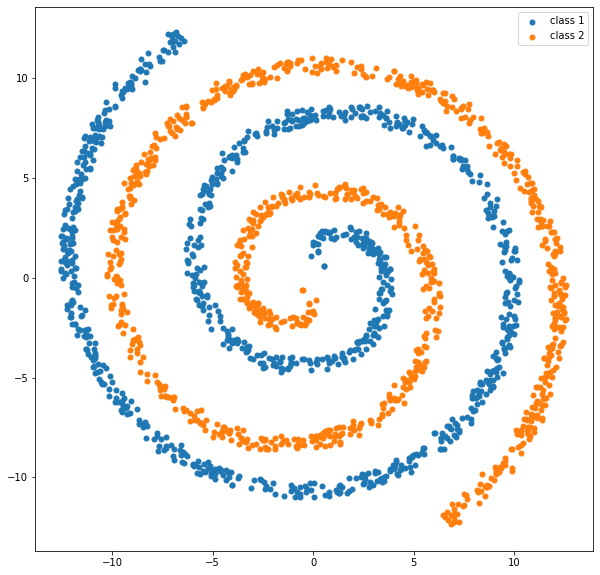

In [7]:
#Spiral plot courtesy from Raymond Hettinger
#https://glowingpython.blogspot.com/2017/04/solving-two-spirals-problem-with-keras.html

def twospirals(n_points, noise):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X, y = twospirals(1000, 0.8)
for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1

plt.figure(figsize = (10,10))
plt.scatter(X[y==-1,0], X[y==-1,1], s=25, label='class 1')
plt.scatter(X[y==1,0], X[y==1,1], s=25, label='class 2')
plt.legend()

In [8]:
import matplotlib.colors as pltcolors

colors = ['blue','red']
cmap = pltcolors.ListedColormap(colors)
nFeatures = 2

In [9]:
def plotLine(ax, xRange, w, x0, label, color='grey', linestyle='-', alpha=1.):
    """ Plot a (separating) line given the normal vector (weights) and point of intercept """
    if type(x0) == int or type(x0) == float or type(x0) == np.float64:
        x0 = [0, -x0 / w[1]]
    yy = -(w[0] / w[1]) * (xRange - x0[0]) + x0[1]
    ax.plot(xRange, yy, color=color, linestyle=linestyle, linewidth=5)
    
def plotKernelSvm(X, y, support=None, ax=None, bound=[[-15., 15], [-15, 15]]):
    """ Plot the SVM separation, and margin """
    if ax is None:
        fig, ax = plt.subplots(1)
    
    im = ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
    if support is not None:
        ax.scatter(support[:,0], support[:,1], s=100, facecolors='none', 
                   edgecolors='purple', color='purple')
        print("Number of support vectors = %d" % (len(support)))

    ax.set_xlim(bound[0])
    ax.set_ylim(bound[1])
    loc = np.arange(-1,1,1)
    
    plt.axis('off')

In [10]:
def GRBF(x1, x2):
    diff = x1 - x2
    return np.exp(-np.dot(diff, diff) * 0.1)

class KernelSvmClassifier:
    
    def __init__(self, C, kernel):
        self.C = C                               
        self.kernel = kernel          
        self.alpha = None
        self.supportVectors = None
    
    def fit(self, X, y):
        N = len(y)
        
        self.kernel_matrix = np.zeros((N, N))

        for i in range(N):
            for j in range(N):
                self.kernel_matrix[i, j] = self.kernel(X[i], X[j])
                
        GramHXy = self.kernel_matrix * np.outer(y, y) 
 
        # Lagrange dual problem
        def Ld0(G, alpha):
            return 0.5 * alpha.dot(alpha.dot(G)) - alpha.sum()

        # Partial derivate of Ld on alpha
        def Ld0dAlpha(G, alpha):
            return alpha.dot(G) - np.ones_like(alpha)

        # Constraints on alpha of the shape :
        A = np.eye(N)
        constraints = ({'type': 'eq',   'fun': lambda a: np.dot(a, y), 'jac': lambda a: y},
                       {'type': 'ineq', 'fun': lambda a: a, 'jac': lambda a: A}, 
                       {'type': 'ineq', 'fun': lambda a: self.C - a, 'jac': lambda a: -A})

        # Maximize by minimizing the opposite
        optRes = optimize.minimize(fun=lambda a: Ld0(GramHXy, a),
                                   x0=np.ones(N), 
                                   method='SLSQP', 
                                   jac=lambda a: Ld0dAlpha(GramHXy, a), 
                                   constraints=constraints)
        
        self.alpha = optRes.x
        epsilon = 1e-8
        supportIndices = self.alpha > epsilon
        self.supportVectors = X[supportIndices]
        self.supportAlphaY = y[supportIndices] * self.alpha[supportIndices]

        
    def predict(self, X):
        """ Predict y values in {-1, 1} """

        def predict1(x):
            x1 = np.apply_along_axis(lambda s: self.kernel(s, x), 1, self.supportVectors)
            x2 = x1 * self.supportAlphaY
            return np.sum(x2)
        
        d = np.apply_along_axis(predict1, 1, X)
        return 2 * (d > 0) - 1

In [11]:
model01 = KernelSvmClassifier(C=1000, kernel=GRBF)
model01.fit(X, y)

Number of support vectors = 86


Text(0.5, 1.0, 'C = 1000, RBF Kernel')

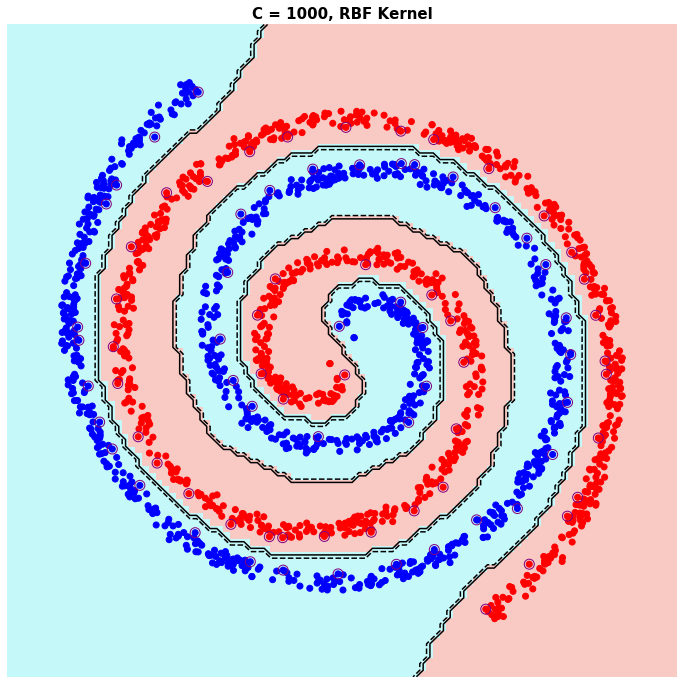

In [12]:
from matplotlib.colors import ListedColormap

# Estimate and plot decision boundary
fig, ax = plt.subplots(figsize=(12, 12))

xx = np.linspace(-15, 15, 100)
X0, X1 = np.meshgrid(xx, xx)
xy = np.vstack([X0.ravel(), X1.ravel()]).T
Z = model01.predict(xy).reshape(X0.shape)

# Create color map
cmap_light = ListedColormap(['#C4F8F9', '#F9C9C4'])

plt.pcolormesh(X0, X1, Z, cmap=cmap_light)
plotKernelSvm(X, y, support=model01.supportVectors, ax=ax)
ax.contour(X0, X1, Z, colors='k', levels=[-1, 0], linestyles=['--', '-'])
plt.title(f'C = {model01.C}, RBF Kernel', fontsize = 15, fontweight = 'bold')

### References
[1] CS4780/CS5780: Machine Learning for Intelligent Systems. Kilian Weinberger, 2017. https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote09.html

[2] Antoine Hue. Support Vector Machines. https://tonio73.github.io/data-science/classification/ClassificationSVM.html

[3] An Idiot’s guide to Support vector machines (SVMs). R Berwick. http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf